In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from matplotlib import pyplot as plt
import seaborn as sns

### Task 3

a) Detect outliers using methods such as the IQR method or Z-score.

Using IQR:

In [32]:
data = pd.read_csv("datasets/smoking_drinking_dataset.csv")
pd.set_option('display.max_columns', None)

def get_means(males, females, features):
    means_males = dict()
    means_females = dict()

    for feature in features:
        means_males[feature] = males[feature].mean()
        means_females[feature] = females[feature].mean()
    
    return means_males, means_females

def detect_outliers(data, features):
    data["outlier"] = 0

    males = data.loc[data["sex"] == "Male"]
    females = data.loc[data["sex"] == "Female"]
    print("Number of males:", len(males))
    print("Number of females:", len(females), "\n")

    mean_males, mean_females = get_means(males, females, features)

    for feature in features:
        Q1_males = males[feature].quantile(0.25)
        Q1_females = females[feature].quantile(0.25)

        Q3_males = males[feature].quantile(0.75)
        Q3_females = females[feature].quantile(0.75)

        IQR_males = Q3_males - Q1_males
        IQR_females = Q3_females - Q1_females

        lower_bound_males = Q1_males - 1.5 * IQR_males
        lower_bound_females = Q1_females - 1.5 * IQR_females
        
        upper_bound_males = Q3_males + 1.5 * IQR_males
        upper_bound_females = Q3_females + 1.5 * IQR_females

        print("Males", feature, "lower:", lower_bound_males, "upper:", upper_bound_males)
        print("Females", feature, "lower:", lower_bound_females, "upper:", upper_bound_females)
        print()

        males.loc[(males[feature] < lower_bound_males) | (males[feature] > upper_bound_males), "outlier"] = 1
        males.loc[(males[feature] < lower_bound_males) | (males[feature] > upper_bound_males), feature] = mean_males[feature]

        females.loc[(females[feature] < lower_bound_females) | (females[feature] > upper_bound_females), "outlier"] = 1
        females.loc[(females[feature] < lower_bound_females) | (females[feature] > upper_bound_females), feature] = mean_females[feature]

    return pd.concat([males, females])

features = ["age","height","weight","waistline","sight_left","sight_right","SBP","DBP","BLDS","tot_chole","HDL_chole","LDL_chole","triglyceride","hemoglobin","serum_creatinine","SGOT_AST","SGOT_ALT","gamma_GTP"]

data = detect_outliers(data, features)

anomalies = data.loc[data["outlier"] == 1]
normal = data.loc[data["outlier"] == 0]

print("Total:", len(normal) + len(anomalies))
print("Anomalies:", len(anomalies))
print("Normal: ", len(normal))
print(f"Anomaly ratio: {len(anomalies) / (len(normal) + len(anomalies)):.2f}")

Number of males: 526415
Number of females: 464931 

Males age lower: 5.0 upper: 85.0
Females age lower: 10.0 upper: 90.0

Males height lower: 150.0 upper: 190.0
Females height lower: 135.0 upper: 175.0

Males weight lower: 50.0 upper: 90.0
Females weight lower: 35.0 upper: 75.0

Males waistline lower: 65.0 upper: 105.0
Females waistline lower: 50.5 upper: 102.5

Males sight_left lower: 0.20000000000000018 upper: 1.7999999999999998
Females sight_left lower: -0.050000000000000044 upper: 1.95

Males sight_right lower: 0.20000000000000018 upper: 1.7999999999999998
Females sight_right lower: 0.2499999999999999 upper: 1.4500000000000002

Males SBP lower: 90.5 upper: 158.5
Females SBP lower: 80.0 upper: 160.0



/tmp/ipykernel_72719/3381813180.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '46.5053142482642' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  males.loc[(males[feature] < lower_bound_males) | (males[feature] > upper_bound_males), feature] = mean_males[feature]
/tmp/ipykernel_72719/3381813180.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48.8703485033263' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  females.loc[(females[feature] < lower_bound_females) | (females[feature] > upper_bound_females), feature] = mean_females[feature]
/tmp/ipykernel_72719/3381813180.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '168.54611855665206' has dtype inco

Males DBP lower: 49.0 upper: 105.0
Females DBP lower: 50.0 upper: 98.0

Males BLDS lower: 63.0 upper: 135.0
Females BLDS lower: 64.5 upper: 124.5

Males tot_chole lower: 94.0 upper: 294.0
Females tot_chole lower: 95.0 upper: 295.0

Males HDL_chole lower: 17.5 upper: 85.5
Females HDL_chole lower: 21.0 upper: 101.0

Males LDL_chole lower: 20.0 upper: 204.0
Females LDL_chole lower: 20.0 upper: 204.0

Males triglyceride lower: -63.5 upper: 332.5
Females triglyceride lower: -34.0 upper: 230.0

Males hemoglobin lower: 12.5 upper: 18.1
Females hemoglobin lower: 10.549999999999999 upper: 15.750000000000002

Males serum_creatinine lower: 0.35 upper: 1.5500000000000003
Females serum_creatinine lower: 0.2999999999999999 upper: 1.1

Males SGOT_AST lower: 3.5 upper: 47.5
Females SGOT_AST lower: 6.0 upper: 38.0

Males SGOT_ALT lower: -7.5 upper: 60.5
Females SGOT_ALT lower: -4.5 upper: 39.5

Males gamma_GTP lower: -28.5 upper: 103.5
Females gamma_GTP lower: -3.5 upper: 40.5

Total: 991346
Anomalies:

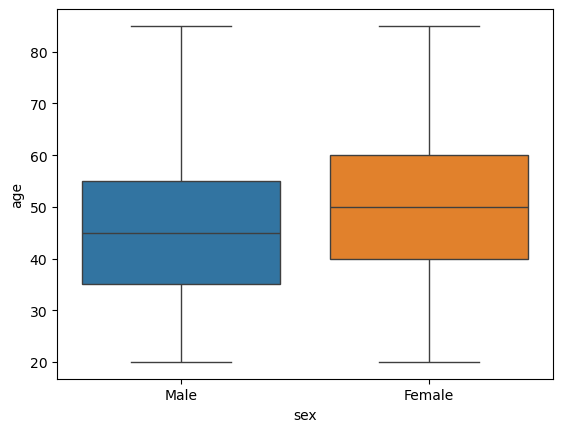

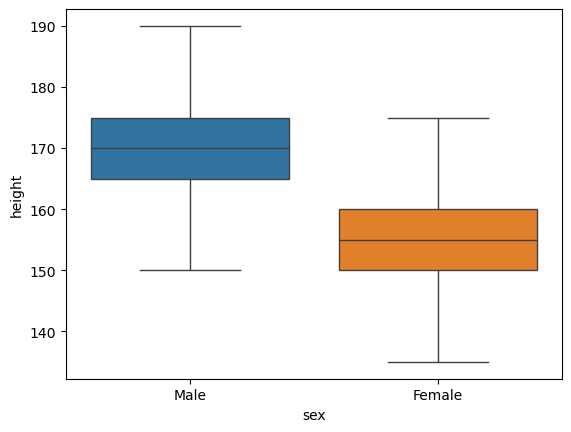

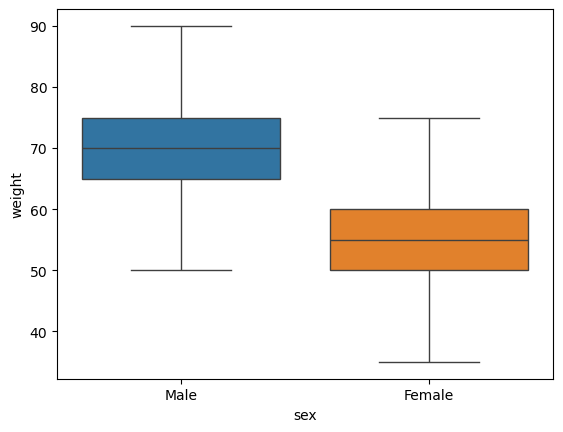

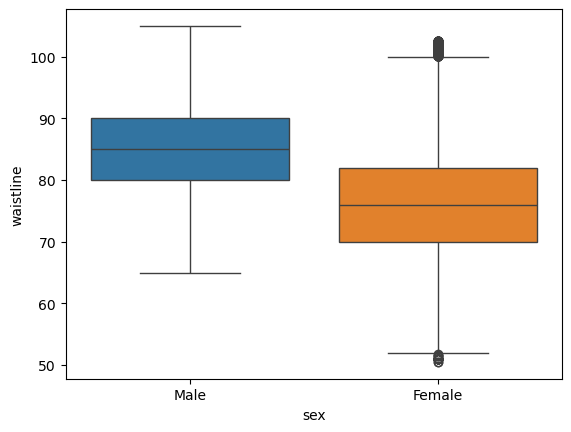

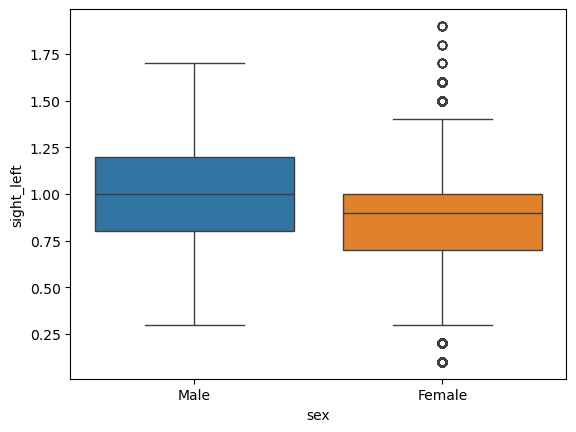

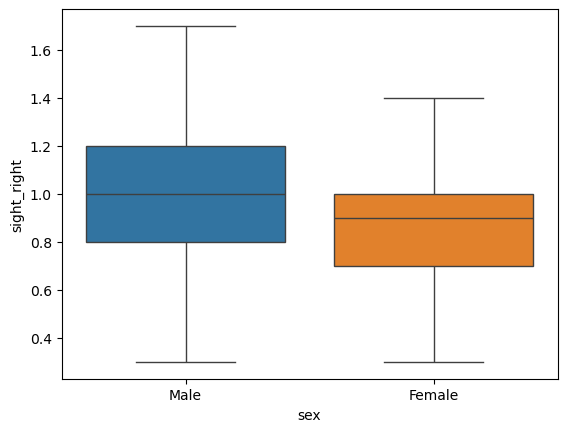

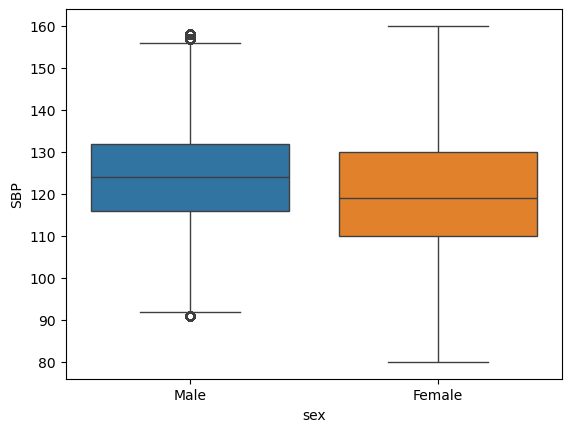

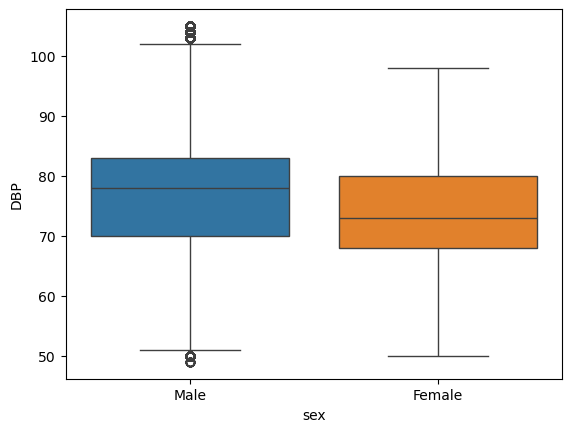

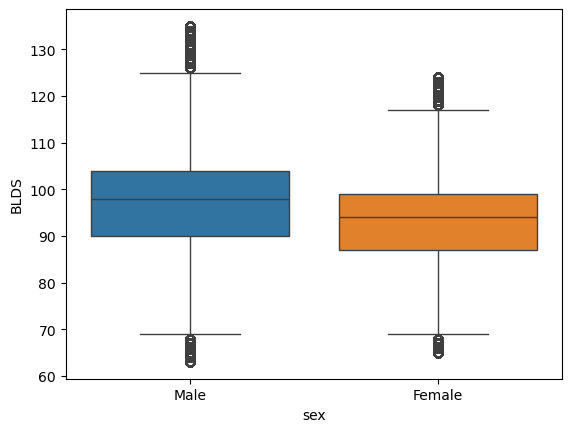

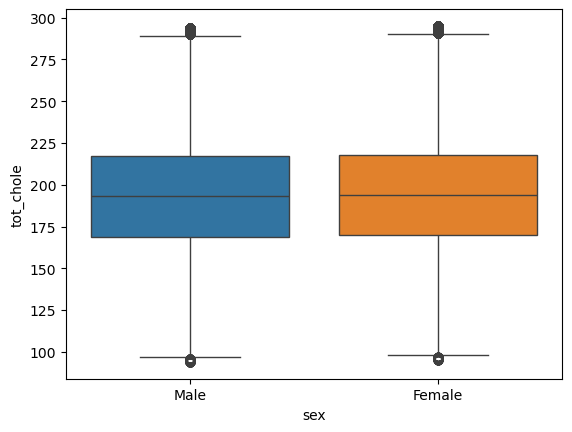

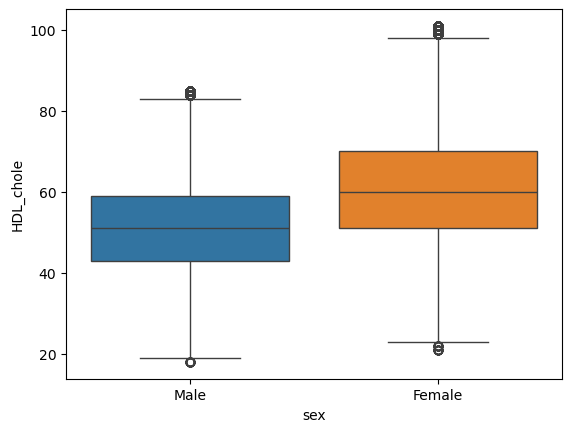

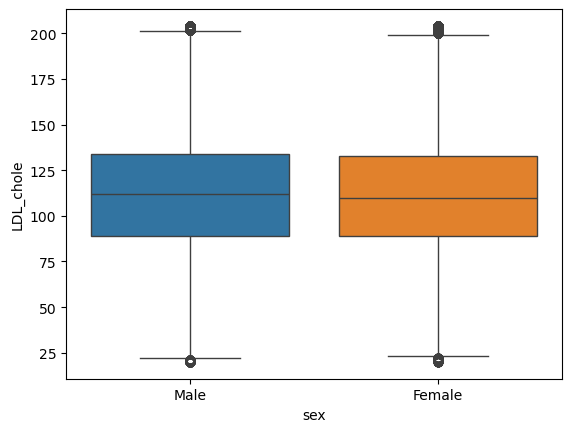

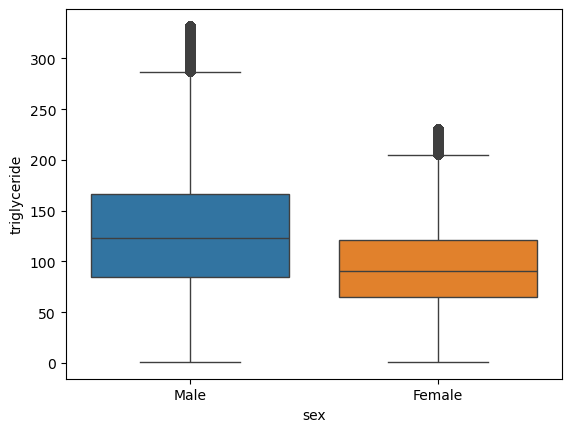

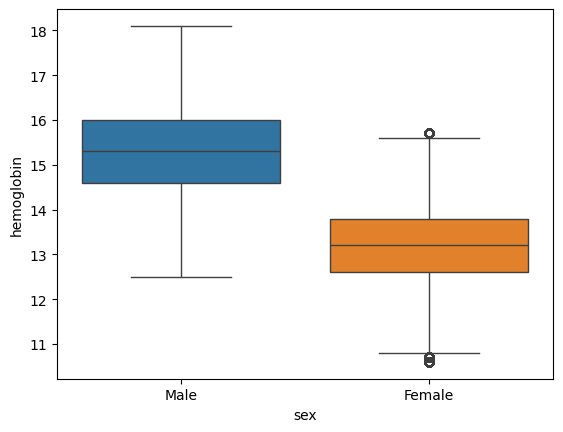

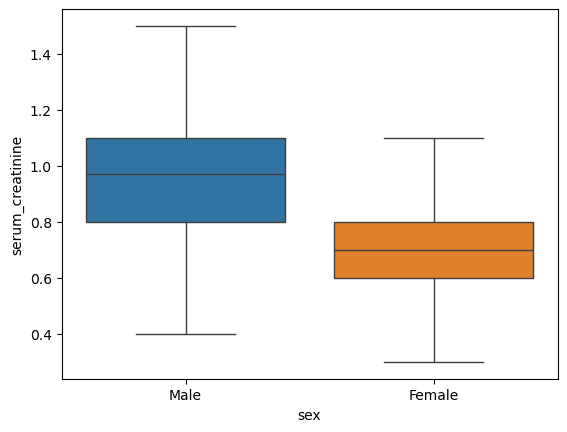

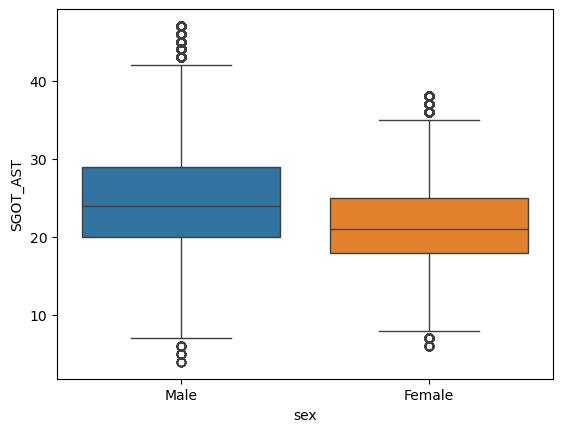

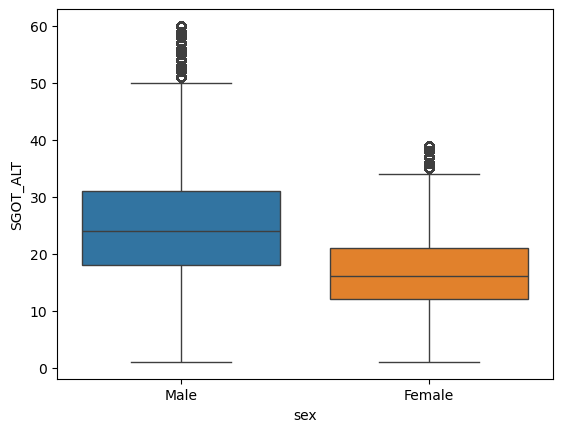

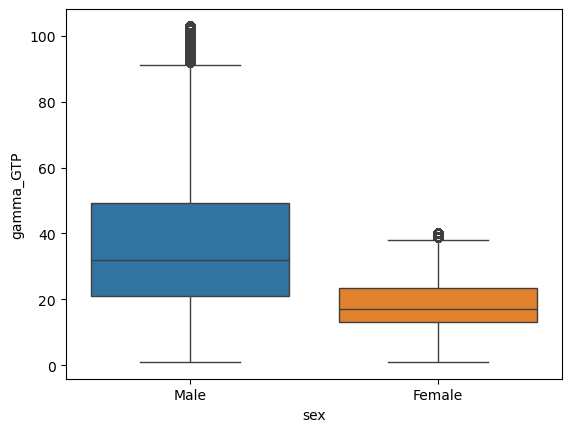

Descriptive statistics of numerical columns:
        age  height  weight  waistline  sight_left  sight_right  hear_left  \
mean  47.61  162.25   62.60      80.96        0.95         0.94       1.03   
std   14.18    9.28   11.25       9.15        0.32         0.28       0.17   
min   20.00  135.00   35.00      50.50        0.10         0.30       1.00   
25%   35.00  155.00   55.00      74.50        0.70         0.80       1.00   
75%   60.00  170.00   70.00      87.00        1.20         1.20       1.00   
max   85.00  190.00   90.00     105.00        1.90         1.70       2.00   

      hear_right     SBP     DBP    BLDS  tot_chole  HDL_chole  LDL_chole  \
mean        1.03  121.87   75.71   96.23     194.33      56.16     112.05   
std         0.17   13.34    9.27   11.46      35.73      13.63      32.59   
min         1.00   80.00   49.00   63.00      94.00      18.00      20.00   
25%         1.00  112.00   70.00   89.00     169.00      46.00      89.00   
75%         1.00  130.0

In [33]:
sns.boxplot(data=data, x="sex", y="age", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="height", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="weight", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="waistline", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="sight_left", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="sight_right", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="SBP", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="DBP", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="BLDS", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="tot_chole", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="HDL_chole", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="LDL_chole", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="triglyceride", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="hemoglobin", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="serum_creatinine", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="SGOT_AST", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="SGOT_ALT", hue="sex")
plt.show()

sns.boxplot(data=data, x="sex", y="gamma_GTP", hue="sex")
plt.show()

print("Descriptive statistics of numerical columns:")
print(data.describe().loc[['mean', 'std', 'min', '25%', '75%', 'max']].round(2), "\n")

In [5]:
data = pd.read_csv("datasets/smoking_drinking_dataset.csv")

data["sex"] = data["sex"].replace({"Male": True, "Female": False}).infer_objects(copy=False)
data["DRK_YN"] = data["DRK_YN"].replace({"Y": True, "N": False}).infer_objects(copy=False)

Iforest = IsolationForest(contamination=0.05, random_state=1111)

Iforest.fit(data)

data["anomaly_score"] = Iforest.decision_function(data)
data["anomaly"] = Iforest.predict(data.drop("anomaly_score", axis=1))
data["anomaly"] = data["anomaly"].replace({1: False, -1: True}) # Outlier = -1, Inlier = 1

num_anomalies = len(data[data["anomaly"] == True])
num_inliers = len(data[data["anomaly"] == False])
anomalies = data[data["anomaly"] == 1]

print("Anomalies:", num_anomalies)
print("Inliers:", num_inliers)
print(f"Anomaly percentage: {num_anomalies / (num_anomalies + num_inliers):.2f}")

/tmp/ipykernel_13383/3268974233.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["sex"] = data["sex"].replace({"Male": True, "Female": False}).infer_objects(copy=False)
/tmp/ipykernel_13383/3268974233.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["DRK_YN"] = data["DRK_YN"].replace({"Y": True, "N": False}).infer_objects(copy=False)


Anomalies: 49568
Inliers: 941778
Anomaly percentage: 0.05


/tmp/ipykernel_13383/3268974233.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["anomaly"] = data["anomaly"].replace({1: False, -1: True}) # Outlier = -1, Inlier = 1
